- PILLOW is one optional module to read digital images
- For PNG file: RGBA means Red, Green, Blue, Alpha where Alpha is transparency.

Sources:

https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image

https://www.tutorialspoint.com/how-to-adjust-the-hue-of-an-image-in-pytorch

https://www.geeksforgeeks.org/visualizing-colors-in-images-using-histogram-in-python/

In [1]:
from PIL import Image
from numpy import asarray
import imageio
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from skimage.color import rgb2lab, deltaE_cie76
from collections import Counter
import os 
import cv2
import matplotlib.image as img
import pandas as pd
from scipy.cluster.vq import whiten
from PIL import Image
import sys
import os
import os.path
from os import path
import math 
import matplotlib.cm as cm


## Reading Images

In [2]:
# load the image
redimage = Image.open('/Users/macboss/Desktop/final data/shot_red_marilyn_1964-19604.png')
# convert image to numpy array
red_data = asarray(redimage)
print(type(red_data))
# summarize shape
print(red_data.shape)

# create Pillow image
REDimage = Image.fromarray(red_data)
print(type(REDimage))

# summarize image details
print(REDimage.mode)
print(REDimage.size)

<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)


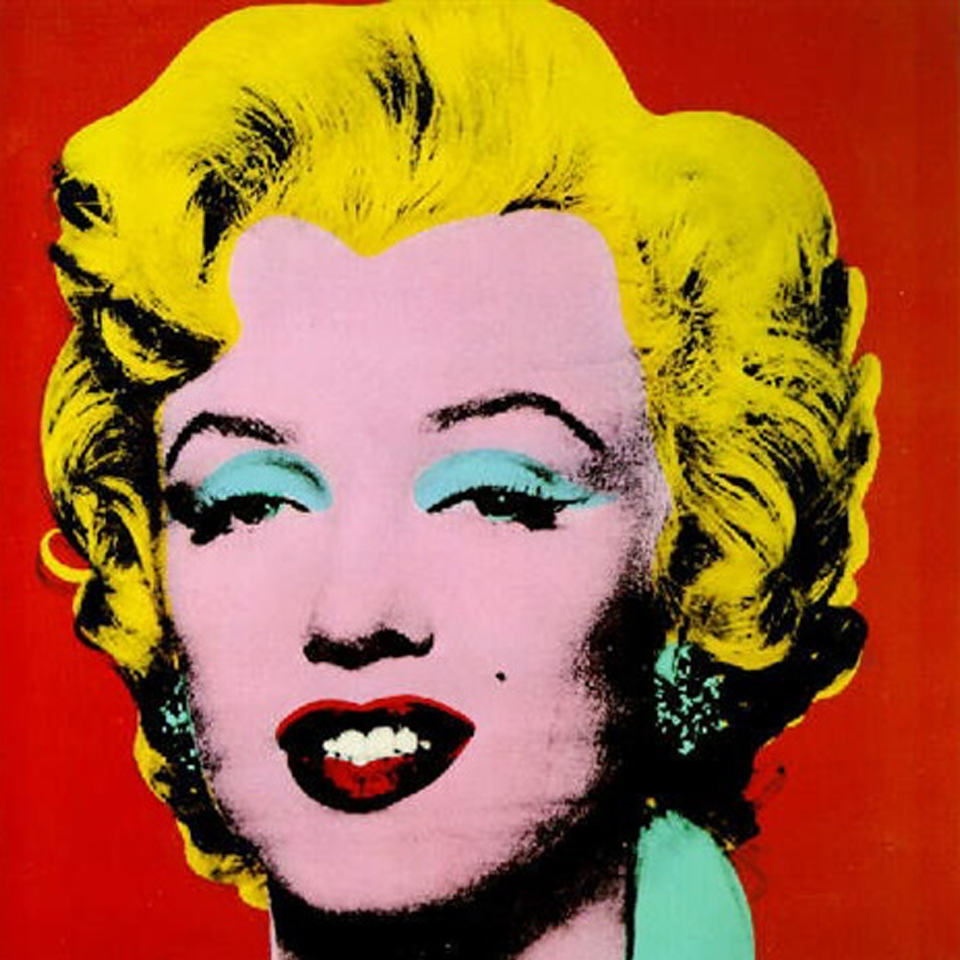

In [3]:
REDimage

- jpeg file does not support transparency 
- You need to discard the Alpha Channel or save as something that supports transparency - like PNG.

In [4]:
# load the image
blueimage = Image.open('/Users/macboss/Desktop/final data/shot_blue_marilyn_1964-19604.jpg')
# convert image to numpy array
blue_data = asarray(blueimage)
print(type(blue_data))
# summarize shape
print(blue_data.shape)

# create Pillow image
BLUEimage = Image.fromarray(blue_data)
print(type(BLUEimage))

# summarize image details
print(BLUEimage.mode)
print(BLUEimage.size)

<class 'numpy.ndarray'>
(960, 960, 3)
<class 'PIL.Image.Image'>
RGB
(960, 960)


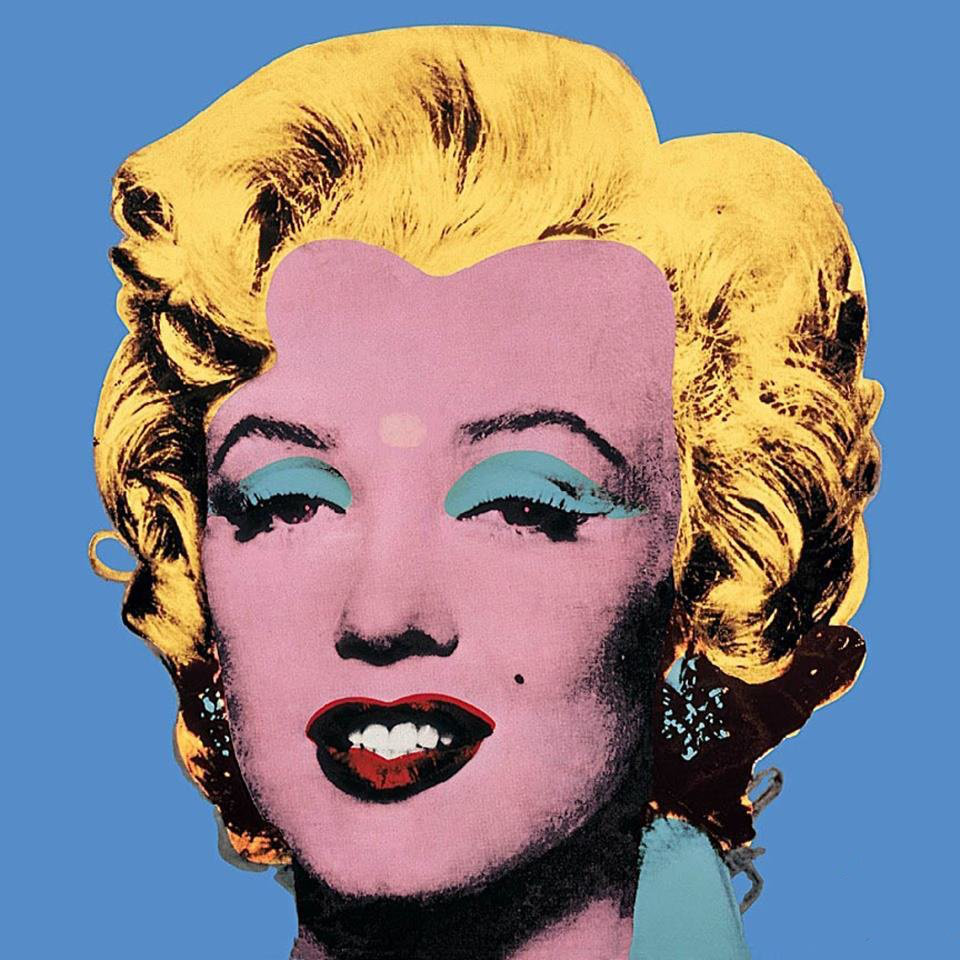

In [5]:
BLUEimage

In [6]:
# egg blue

# load the image
eggblueimage = Image.open('/Users/macboss/Desktop/final data/shot_eggblue_marilyn_1964-19604.png')
# convert image to numpy array
eggblue_data = asarray(eggblueimage)
print(type(eggblue_data))
# summarize shape
print(eggblue_data.shape)

# create Pillow image
EGGBLUEimage = Image.fromarray(eggblue_data)
print(type(EGGBLUEimage))

# summarize image details
print(EGGBLUEimage.mode)
print(EGGBLUEimage.size)

<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)


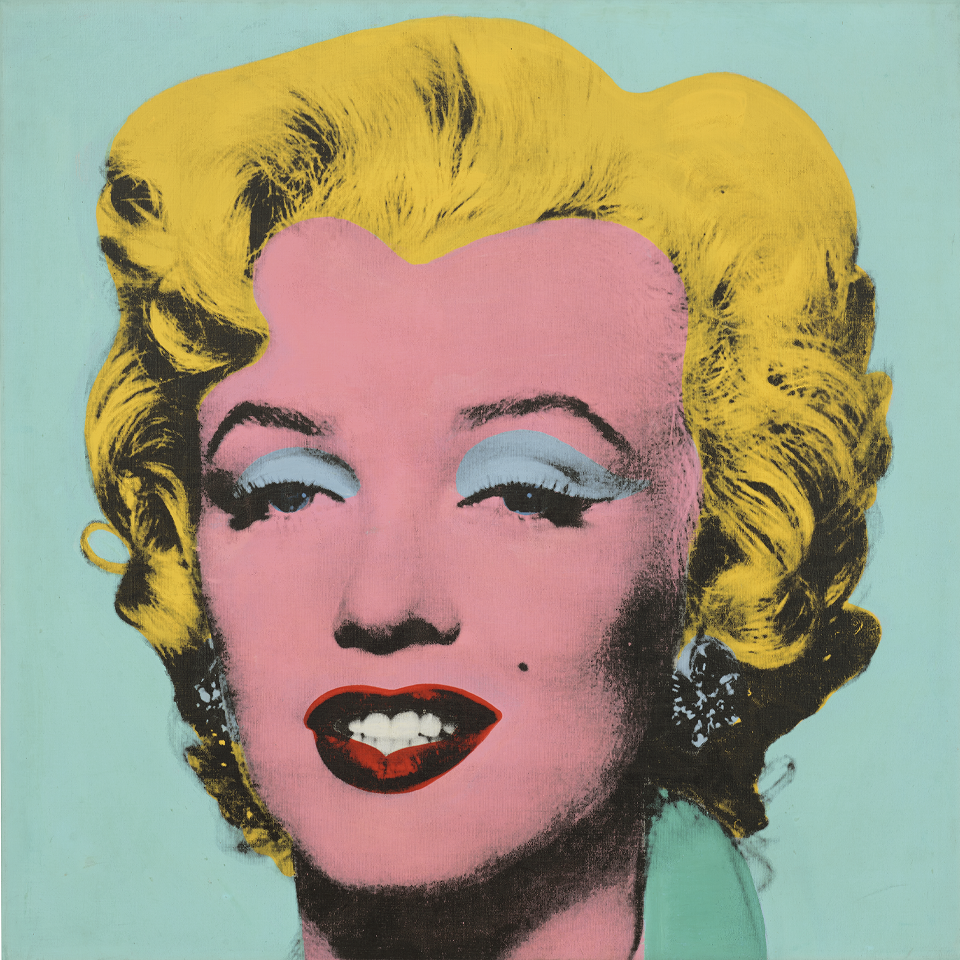

In [7]:
EGGBLUEimage

In [8]:
# orange
# load the image
orangeimage = Image.open('/Users/macboss/Desktop/final data/shot_orange_marilyn_1964-19604.png')
# convert image to numpy array
orange_data = asarray(orangeimage)
print(type(orange_data))
# summarize shape
print(orange_data.shape)

# create Pillow image
ORANGEimage = Image.fromarray(orange_data)
print(type(ORANGEimage))

# summarize image details
print(ORANGEimage.mode)
print(ORANGEimage.size)

<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.Image.Image'>
RGBA
(960, 960)


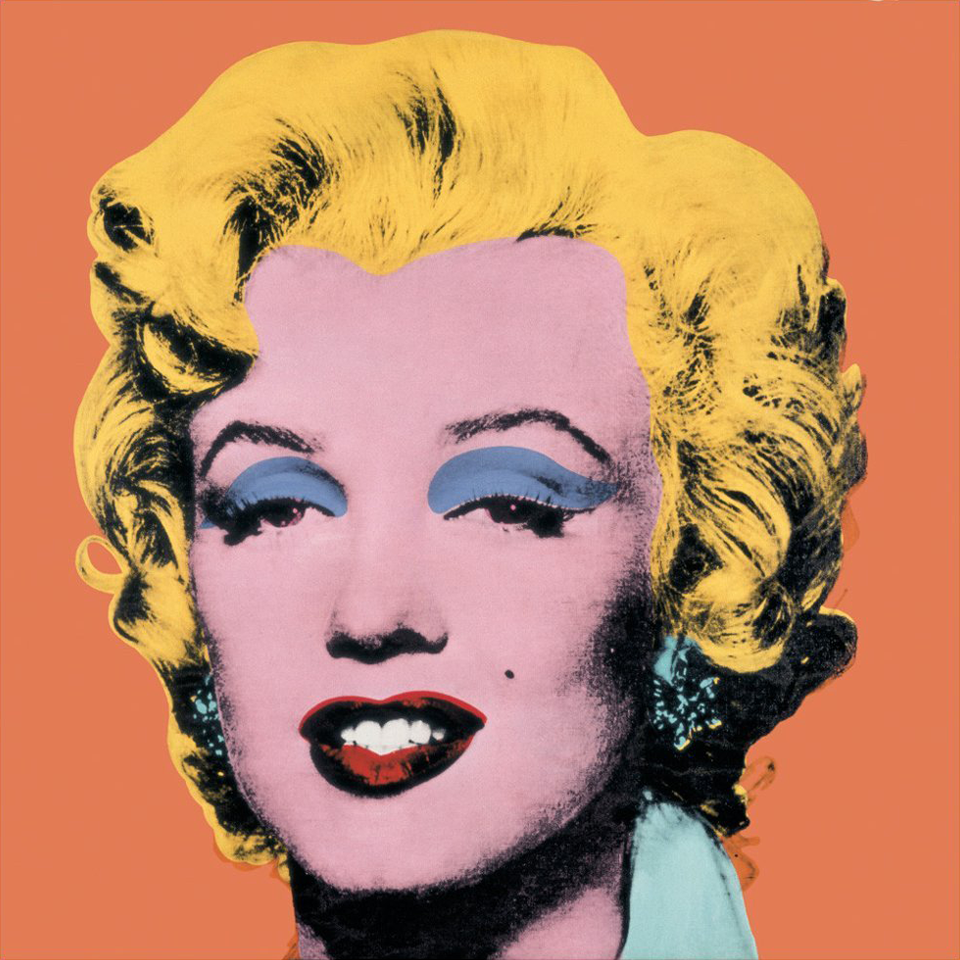

In [9]:
ORANGEimage

In [10]:
# turquoise

# load the image
turqimage = Image.open('/Users/macboss/Desktop/final data/shot_turq_marilyn_1964-19604.png')
# convert image to numpy array
turq_data = asarray(turqimage)
print(type(turq_data))
# summarize shape
print(turq_data.shape)

# create Pillow image
TURQimage = Image.fromarray(turq_data)
print(type(turqimage))

# summarize image details
print(TURQimage.mode)
print(TURQimage.size)

<class 'numpy.ndarray'>
(960, 960, 4)
<class 'PIL.PngImagePlugin.PngImageFile'>
RGBA
(960, 960)


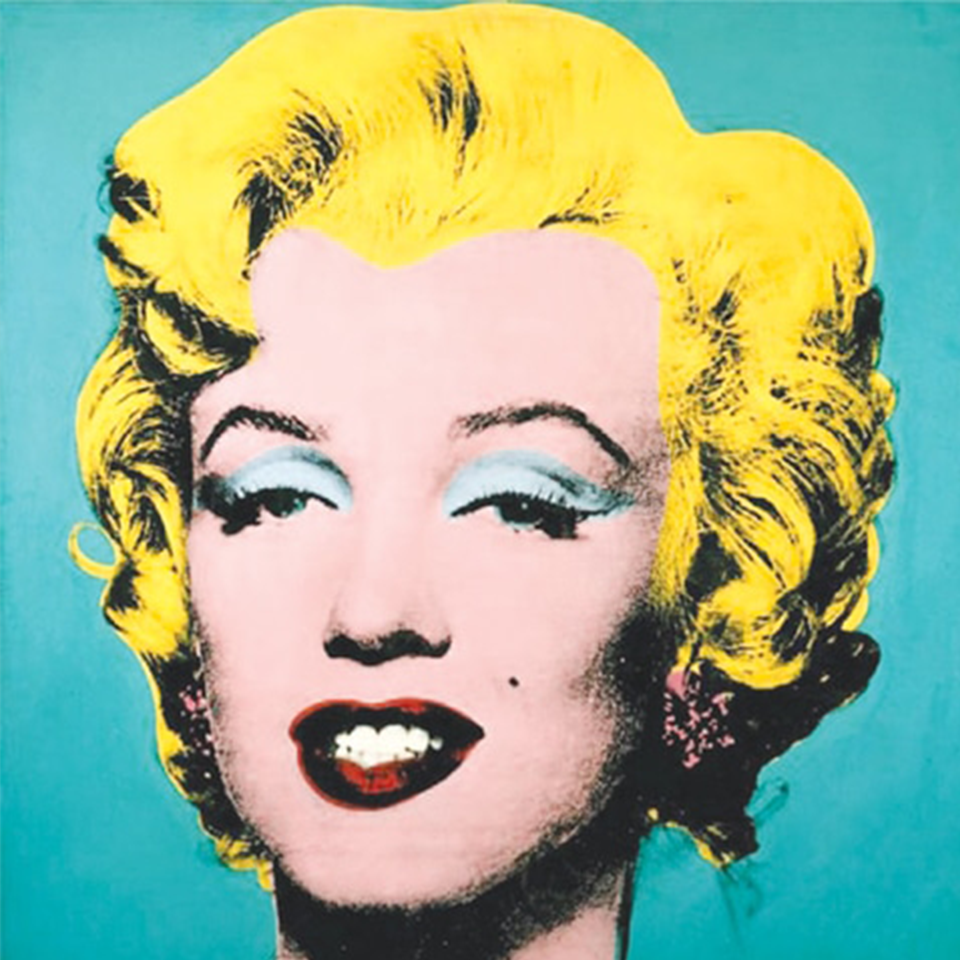

In [11]:
TURQimage

In [12]:
# image data
image_data = [red_data, blue_data, eggblue_data, orange_data, turq_data]
names = ['Red:', 'Blue:', 'Egg Blue:', 'Orange:', 'Turquoise:' ]

i = 0
for image in image_data:
    print(names[i])
    print(image)
    print(' ')
    i += 1

Red:
[[[176  26   6 255]
  [178  26   7 255]
  [177  24   7 255]
  ...
  [152  39   9 255]
  [150  44  12 255]
  [148  46  13 255]]

 [[177  27   7 255]
  [179  27   8 255]
  [178  25   8 255]
  ...
  [152  39   9 255]
  [150  44  12 255]
  [148  46  13 255]]

 [[179  28   8 255]
  [180  28   9 255]
  [179  27   9 255]
  ...
  [154  41  10 255]
  [151  45  12 255]
  [149  47  13 255]]

 ...

 [[182   3   1 255]
  [182   3   1 255]
  [182   2   2 255]
  ...
  [174  32   6 255]
  [172  32   5 255]
  [169  30   2 255]]

 [[183   4   2 255]
  [183   4   2 255]
  [183   4   2 255]
  ...
  [172  34   4 255]
  [170  33   3 255]
  [168  31   2 255]]

 [[184   6   4 255]
  [185   6   4 255]
  [185   6   3 255]
  ...
  [169  36   2 255]
  [168  36   1 255]
  [166  34   1 255]]]
 
Blue:
[[[ 86 140 200]
  [ 86 140 200]
  [ 86 140 200]
  ...
  [ 86 140 200]
  [ 86 140 200]
  [ 86 140 200]]

 [[ 86 140 200]
  [ 86 140 200]
  [ 86 140 200]
  ...
  [ 86 140 200]
  [ 86 140 200]
  [ 86 140 200]]

 [[ 8

## Dominant Colors

In [13]:
import scipy.cluster
import sklearn.cluster
import numpy
from PIL import Image

def dominant_colors(image):  # PIL image input
    ar = numpy.asarray(image)
    shape = ar.shape
    ar = ar.reshape(numpy.product(shape[:2]), shape[2]).astype(float)

    kmeans = sklearn.cluster.MiniBatchKMeans(
        n_clusters=10,
        init="k-means++",
        max_iter=20,
        random_state=1000
    ).fit(ar)
    codes = kmeans.cluster_centers_

    vecs, _dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, _bins = numpy.histogram(vecs, len(codes))    # count occurrences

    colors = []
    for index in numpy.argsort(counts)[::-1]:
        colors.append(tuple([int(code) for code in codes[index]]))
    return colors                    # returns colors in order of dominance

In [14]:
# dominant colors 

print('Red:')
print(dominant_colors(REDimage))
print(' ')
print('Turquoise:')
print(dominant_colors(TURQimage))
print(' ')
print('Blue:')
print(dominant_colors(BLUEimage))
print(' ')
print('Orange:')
print(dominant_colors(ORANGEimage))
print(' ')
print('Egg Blue:')
print(dominant_colors(EGGBLUEimage))

Red:
[(186, 20, 2, 254), (231, 176, 193, 255), (226, 203, 7, 254), (9, 5, 4, 254), (191, 166, 21, 255), (202, 151, 159, 254), (68, 50, 25, 255), (135, 112, 20, 255), (120, 197, 180, 254), (129, 106, 103, 255)]
 
Turquoise:
[(251, 227, 79, 255), (249, 215, 213, 255), (68, 185, 191, 254), (40, 42, 40, 254), (110, 200, 207, 254), (16, 170, 177, 255), (226, 190, 177, 254), (187, 162, 103, 255), (83, 78, 61, 254), (139, 117, 76, 254)]
 
Blue:
[(86, 140, 199), (245, 205, 104), (217, 152, 169), (22, 14, 15), (197, 136, 148), (97, 56, 42), (144, 102, 99), (205, 154, 74), (112, 156, 168), (227, 179, 185)]
 
Orange:
[(225, 124, 83, 254), (239, 191, 88, 255), (227, 174, 187, 254), (16, 19, 21, 254), (72, 62, 56, 255), (209, 155, 167, 255), (141, 104, 65, 255), (167, 129, 128, 255), (162, 202, 201, 255), (109, 127, 157, 254)]
 
Egg Blue:
[(160, 200, 191, 255), (213, 143, 149, 255), (213, 180, 69, 254), (46, 42, 37, 255), (168, 144, 60, 255), (74, 65, 52, 255), (176, 123, 127, 255), (117, 92, 56, 2

In [15]:
# function for histogram of dominant colors

def color_histogram(colors):
    
    # number of dominant colors
    num_colors = len(colors)

    # array of color labels
    labels = np.arange(num_colors)

    # array of color frequencies
    frequencies = np.ones(num_colors) / num_colors

    # bar plot of the histogram
    plt.bar(labels, frequencies, color= np.array(colors) / 255)
    plt.xlabel('Color')
    plt.ylabel('Frequency')
    plt.title('Dominant Color Histogram')
    plt.xticks(labels)
    plt.show()

Red:
 


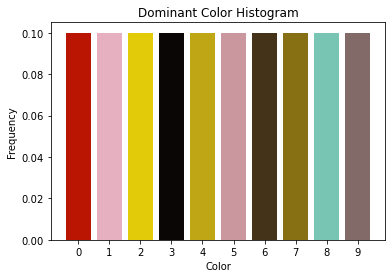

Blue:
 


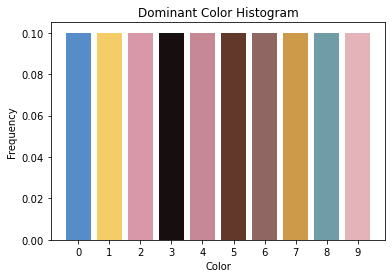

Egg Blue:
 


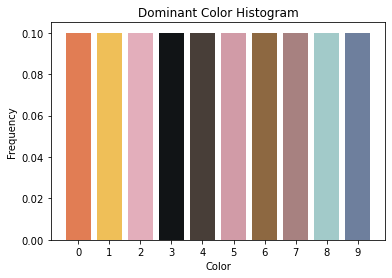

Orange:
 


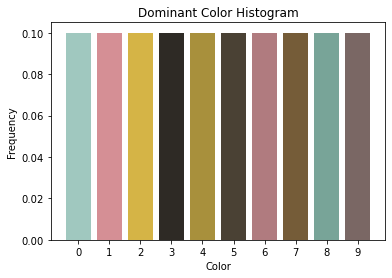

Turquoise:
 


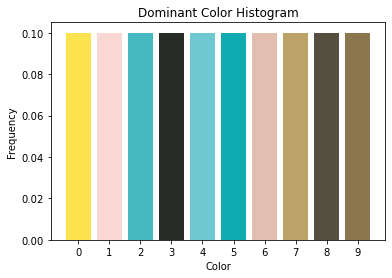

In [16]:
# histograms
images = [REDimage, BLUEimage, ORANGEimage, EGGBLUEimage, TURQimage]

i = 0
for image in images:
    print(names[i])
    print(' ')
    color_histogram(dominant_colors(image))
    i += 1

## Average RGB

In [17]:
# average RGB

def compute_average_image_color(img_path):

    if not os.path.isfile(img_path):
        print(path_inp_image, 'DONT EXISTS, EXIT')
        sys.exit()

    # read in images
    img = Image.open(img_path).convert('RGBA')
    img = img.resize((50,50)) # resize for efficiency

    width, height = img.size
    r_total = 0
    g_total = 0
    b_total = 0
    count = 0
    red_list=[]
    green_list=[]
    blue_list=[]
    
    # iterate over each pixel
    for x in range(0, width):
        for y in range(0, height):
            r, g, b, alpha = img.getpixel((x,y))
            
            if alpha !=0:
                red_list.append(r)
                green_list.append(g)
                blue_list.append(b)
            
                r_total += r
                g_total += g
                b_total += b
                count += 1

    # avg, min, max rgb     
    average_color=(round(r_total/count), round(g_total/count), round(b_total/count))
    print(average_color)
    
    red_list.sort()
    green_list.sort()
    blue_list.sort()

    red_min_max=[]
    green_min_max=[]
    blue_min_max=[]
    
    red_min_max.append(min(red_list))
    red_min_max.append(max(red_list))
    green_min_max.append(min(green_list))
    green_min_max.append(max(red_list))
    blue_min_max.append(min(blue_list))
    blue_min_max.append(max(blue_list))
    
    print('red_min_max: ', red_min_max)
    print('green_min_max: ', green_min_max)
    print('blue_min_max: ', blue_min_max)

    #variance and standard deviation
    red_stddev=round(math.sqrt(np.var(red_list)))
    green_stddev=round(math.sqrt(np.var(green_list)))
    blue_stddev=round(math.sqrt(np.var(blue_list)))

    print('red_stddev: ', red_stddev)
    print('green_stddev: ', green_stddev)
    print('blue_stddev: ', blue_stddev)

# averages
print('Red:')
red_avg = compute_average_image_color('/Users/macboss/Desktop/final data/shot_red_marilyn_1964-19604.png')
print(' ')
print('Turquoise:')
turq_avg = compute_average_image_color('/Users/macboss/Desktop/final data/shot_turq_marilyn_1964-19604.png')
print(' ')
print('Orange:')
orange_avg = compute_average_image_color('/Users/macboss/Desktop/final data/shot_orange_marilyn_1964-19604.png')
print(' ')
print('Blue:')
blue_avg = compute_average_image_color('/Users/macboss/Desktop/final data/shot_blue_marilyn_1964-19604.jpg')
print(' ')
print('Egg Blue:')
eggblue_avg = compute_average_image_color('/Users/macboss/Desktop/final data/shot_eggblue_marilyn_1964-19604.png')

Red:
(170, 104, 58)
red_min_max:  [0, 250]
green_min_max:  [0, 250]
blue_min_max:  [0, 218]
red_stddev:  69
green_stddev:  77
blue_stddev:  78
 
Turquoise:
(154, 178, 143)
red_min_max:  [0, 255]
green_min_max:  [27, 255]
blue_min_max:  [30, 251]
red_stddev:  88
green_stddev:  53
blue_stddev:  64
 
Orange:
(193, 134, 101)
red_min_max:  [0, 255]
green_min_max:  [0, 255]
blue_min_max:  [0, 224]
red_stddev:  65
green_stddev:  46
blue_stddev:  48
 
Blue:
(138, 132, 137)
red_min_max:  [0, 255]
green_min_max:  [0, 255]
blue_min_max:  [0, 215]
red_stddev:  72
green_stddev:  49
blue_stddev:  62
 
Egg Blue:
(163, 153, 127)
red_min_max:  [32, 228]
green_min_max:  [27, 228]
blue_min_max:  [22, 203]
red_stddev:  48
green_stddev:  48
blue_stddev:  57


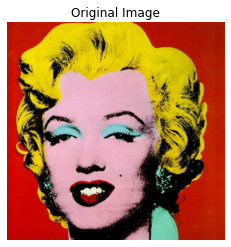

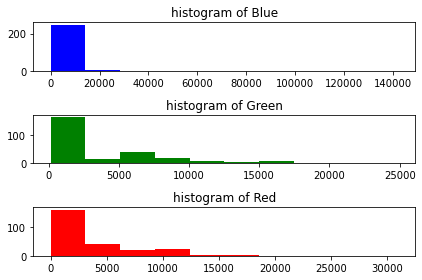

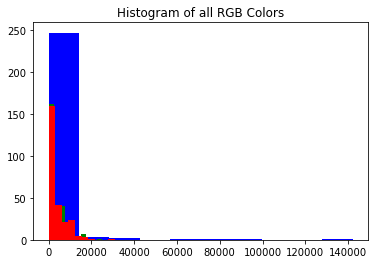

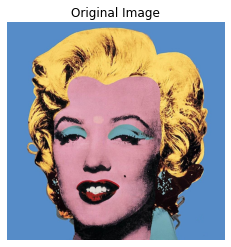

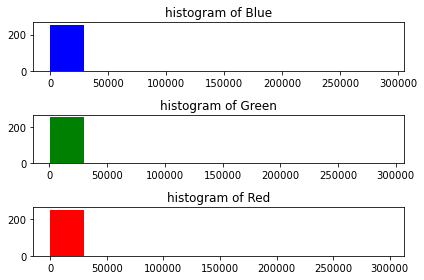

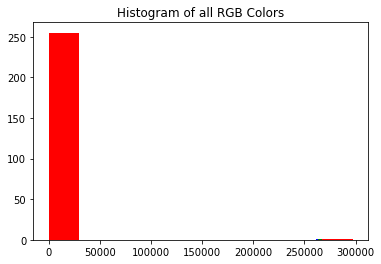

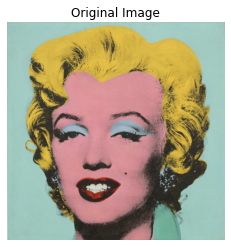

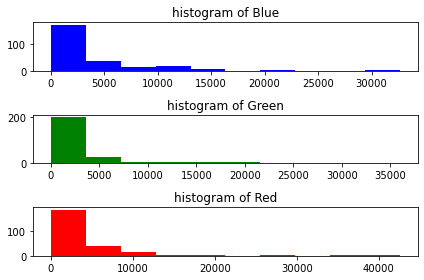

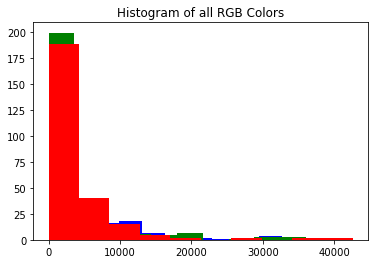

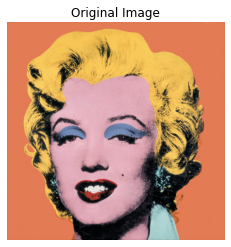

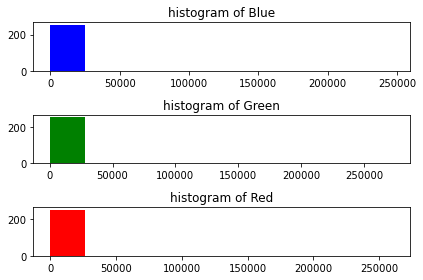

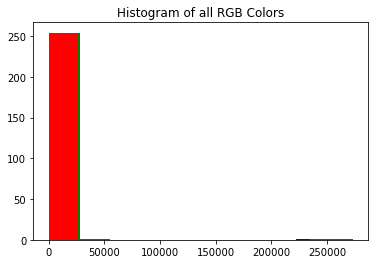

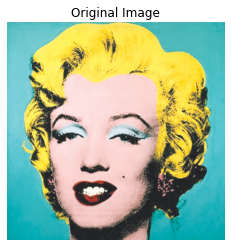

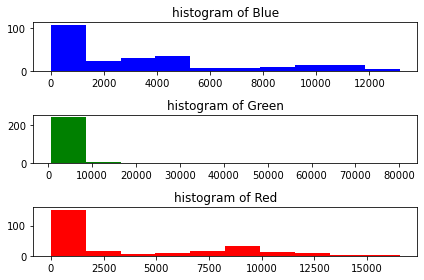

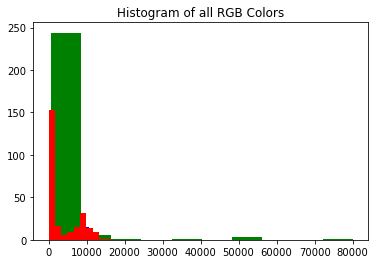

In [18]:
# image paths
image_paths = ['/Users/macboss/Desktop/final data/shot_red_marilyn_1964-19604.png',
              '/Users/macboss/Desktop/final data/shot_blue_marilyn_1964-19604.jpg',
              '/Users/macboss/Desktop/final data/shot_eggblue_marilyn_1964-19604.png',
              '/Users/macboss/Desktop/final data/shot_orange_marilyn_1964-19604.png',
              '/Users/macboss/Desktop/final data/shot_turq_marilyn_1964-19604.png']

for image_path in image_paths:
    # load image
    imageObj = cv2.imread(image_path)
    # to avoid grid lines
    plt.axis("off")
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB))
    plt.show()

    # extract rgb
    blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256])
    red_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256])
    green_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256])

    # histograms for each color
    plt.subplot(3, 1, 1)
    plt.title("histogram of Blue")
    plt.hist(blue_color, color="blue")

    plt.subplot(3, 1, 2)
    plt.title("histogram of Green")
    plt.hist(green_color, color="green")

    plt.subplot(3, 1, 3)
    plt.title("histogram of Red")
    plt.hist(red_color, color="red")

    
    plt.tight_layout()
    plt.show()

    # combined histogram
    plt.title("Histogram of all RGB Colors")
    plt.hist(blue_color, color="blue")
    plt.hist(green_color, color="green")
    plt.hist(red_color, color="red")
    plt.show()

## Hue & Saturation

Red:
 


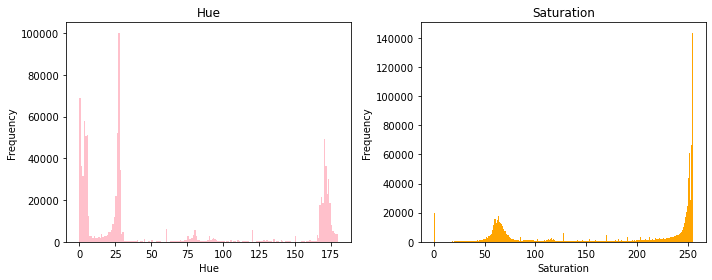

Blue:
 


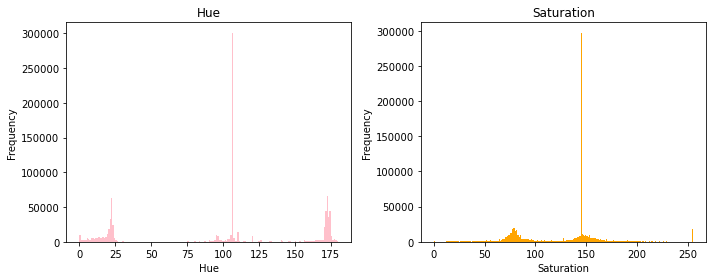

Egg Blue:
 


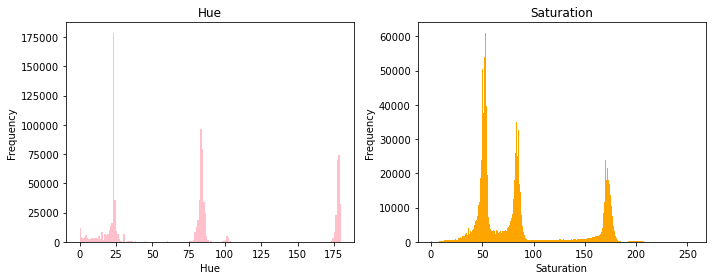

Orange:
 


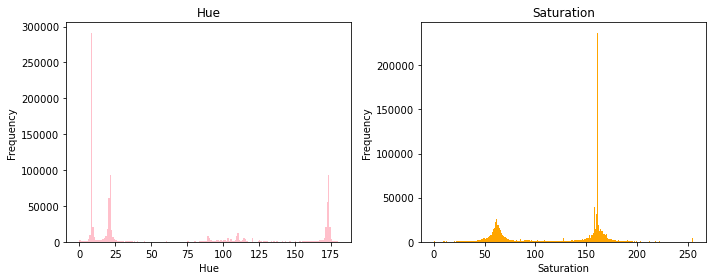

Turquoise:
 


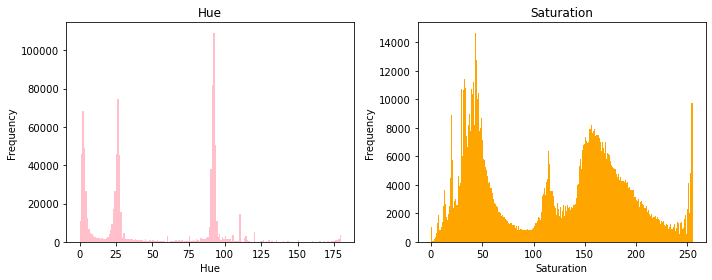

In [19]:
# histogram for hue and saturation

def hue_and_saturation(color):
    # convert to uint8 format
    color = color.astype(np.uint8)

    # convert to hsv
    hsv = cv2.cvtColor(color, cv2.COLOR_RGB2HSV)

    # hue and saturation values
    hue_vals = hsv[:, :, 0].flatten()
    sat_vals = hsv[:, :, 1].flatten()

    # histograms for hue values
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.hist(hue_vals, bins=180, range=(0, 180), color='pink')
    plt.title('Hue')
    plt.xlabel('Hue')
    plt.ylabel('Frequency')

    # histogram for saturation values
    plt.subplot(1, 2, 2)
    plt.hist(sat_vals, bins=256, range=(0, 255), color='orange')
    plt.title('Saturation')
    plt.xlabel('Saturation')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# histograms
i = 0
for image in image_data:
    print(names[i])
    print(' ')
    hue_and_saturation(image)
    i += 1

Red:


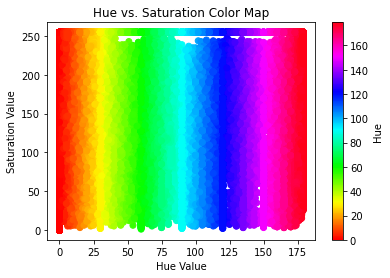

Blue:


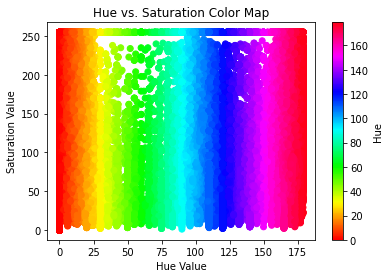

Egg Blue:


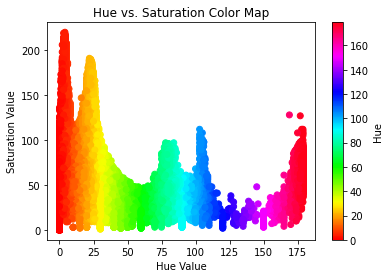

Orange:


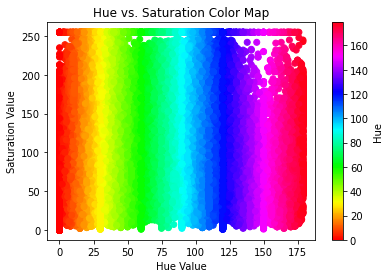

Turquoise:


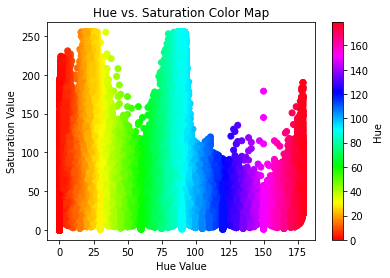

In [20]:
# function to  extract saturation values
def saturation_values(color):
    # convert to uint8 
    color = color.astype(np.uint8)

    # hsv
    hsv = cv2.cvtColor(color, cv2.COLOR_RGB2HSV)

    # extract the saturation values
    sat_vals = hsv[:, :, 1].flatten()

    return sat_vals

# function to extract hue values
def hue_values(color):
    #convert to uint8 
    color = color.astype(np.uint8)

    # hsv
    hsv = cv2.cvtColor(color, cv2.COLOR_RGB2HSV)

    # extract the hue values
    hue_vals = hsv[:, :, 0].flatten()

    return hue_vals


image_paths = ['/Users/macboss/Desktop/final data/shot_red_marilyn_1964-19604.png',
              '/Users/macboss/Desktop/final data/shot_blue_marilyn_1964-19604.jpg',
              '/Users/macboss/Desktop/final data/shot_eggblue_marilyn_1964-19604.png',
              '/Users/macboss/Desktop/final data/shot_orange_marilyn_1964-19604.png',
              '/Users/macboss/Desktop/final data/shot_turq_marilyn_1964-19604.png']

i = 0
for image_path in image_paths:
    # print color name
    print(names[i])

    # read in the images
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # use functions above to extract hue and saturation values from image
    hue_vals = hue_values(image)
    sat_vals = saturation_values(image)

    # create a scatter plot for hue vs saturation
    plt.scatter(hue_vals, sat_vals, c=hue_vals, cmap=cm.hsv)
        
    plt.xlabel('Hue Value')
    plt.ylabel('Saturation Value')
    plt.title('Hue vs. Saturation Color Map')
    plt.colorbar(label='Hue')
    plt.show()
    
    i += 1 

## Density Information

from scipy.stats import gaussian_kde

def img_to_rgbk(image, bw=0.1):
    # Convert the image to a numpy array
    img_array = np.array(image)

    # Reshape the image array to RGB format
    rgb = img_array.reshape(-1, 3).T

    # Compute the kernel density estimation
    kde = gaussian_kde(rgb, bw_method=bw)
    k = kde(rgb)

    # Separate the RGB channels
    r, g, b = rgb

    return r, g, b, k


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

img = np.array(BLUEimage)

r, g, b, k = img_to_rgbk(img, bw=0.5)
ax.scatter(r, g, b, c=k, alpha=0.2)

Red:


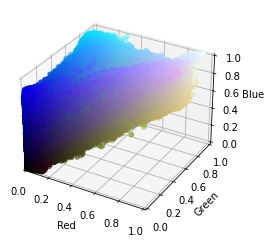

Blue:


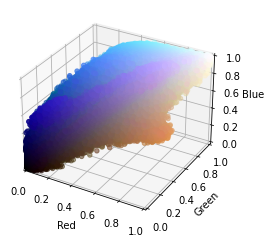

Egg Blue:


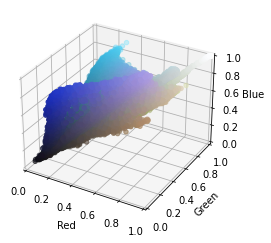

Orange:


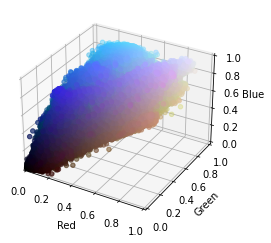

Turquoise:


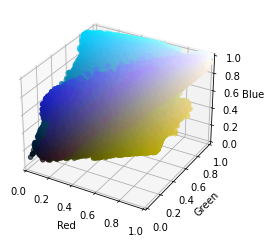

In [26]:
i = 0
for image_path in image_paths:
    
    print(names[i])
    
    #- Load the image
    image = cv2.imread(image_path)

    #- Resize the image
    resized_image = cv2.resize(image, (600, 600))

    #- Convert the resized image to float32
    resized_float = image.astype(np.float32)

    #- Normalize the pixel values to the range [0, 1]
    normalized_image = resized_float / 255.0

    #- Reshape the image to a 1D array
    pixels = normalized_image.reshape(-1, 3)

    #- Create an empty 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    #- Extract the RGB components
    r = pixels[:, 0]
    g = pixels[:, 1]
    b = pixels[:, 2]

    #- Plot the points in the RGB space
    ax.scatter(r, g, b, c=pixels)

    #- Set axis labels
    ax.set_xlabel('Red')
    ax.set_ylabel('Green')
    ax.set_zlabel('Blue')

    #- Set axis limits
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_zlim([0, 1])

    #- Show the plot
    plt.show()
    
    i += 1

## RGB Normalization

In [ ]:
for image_path in image_paths:
    # Load the image
    image = cv2.imread(image_path)

    resized_image = cv2.resize(image, (200, 200))

    # Convert the resized image to float32
    resized_float = resized_image.astype(np.float32)

    # Calculate the sum of RGB values
    rgb_sum = np.sum(resized_float, axis=2)

    # Normalize the RGB values
    normalized_image = np.divide(resized_float, rgb_sum[:, :, np.newaxis])

    # Convert the normalized image back to uint8
    normalized_uint8 = (normalized_image * 255).astype(np.uint8)

    # Display the original and normalized images
    cv2.imshow('Original Image', resized_image)
    cv2.imshow('Normalized Image', normalized_uint8)
    cv2.waitKey(0)
    cv2.destroyAllWindows() 